# LAB1 - CNS
Implement Izhikevich model and develop 20 neuro-computational features of biological neurons

In [1]:
import matplotlib.pyplot as plt

In [2]:
def izhikevich_model(u, w, I, a, b, c, d, tau, reset_u_value=30, c1=0.04, c2=5, c3=140, w_inc=None):
    u += tau * (c1 * u ** 2 + c2 * u + c3 - w + I)
    if w_inc is None:
        w += tau * (a * (b * u - w))
    else:
        w += tau * w_inc(a, b, u)
    u_plot = u
    if u >= 30:
        u = c
        w = w + d
        if reset_u_value is not None:
            u_plot = reset_u_value
    return u, w, u_plot

In [3]:
def plot_simulation(t_list, u_list, w_list, i_list):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(t_list, u_list)
    plt.plot(t_list, i_list)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(u_list, w_list)
    plt.grid()

In [4]:
def simulate_neuron(gen_current, u, a, b, c, d, t_max, tau, w=None, reset_u_value=30, c1=0.04, c2=5, c3=140,
                    w_inc=None):
    t = 0
    tl, ul, wl, il = [t], [u], [w], [0]
    if w is None:
        w = b * u
    while t < t_max:
        I = gen_current(t)
        u, w, u_plot = izhikevich_model(u, w, I, a, b, c, d, tau, reset_u_value, c1=c1, c2=c2, c3=c3, w_inc=w_inc)
        tl.append(t)
        ul.append(u_plot)
        wl.append(w)
        il.append(I)
        t += tau
    plot_simulation(tl, ul, wl, il)

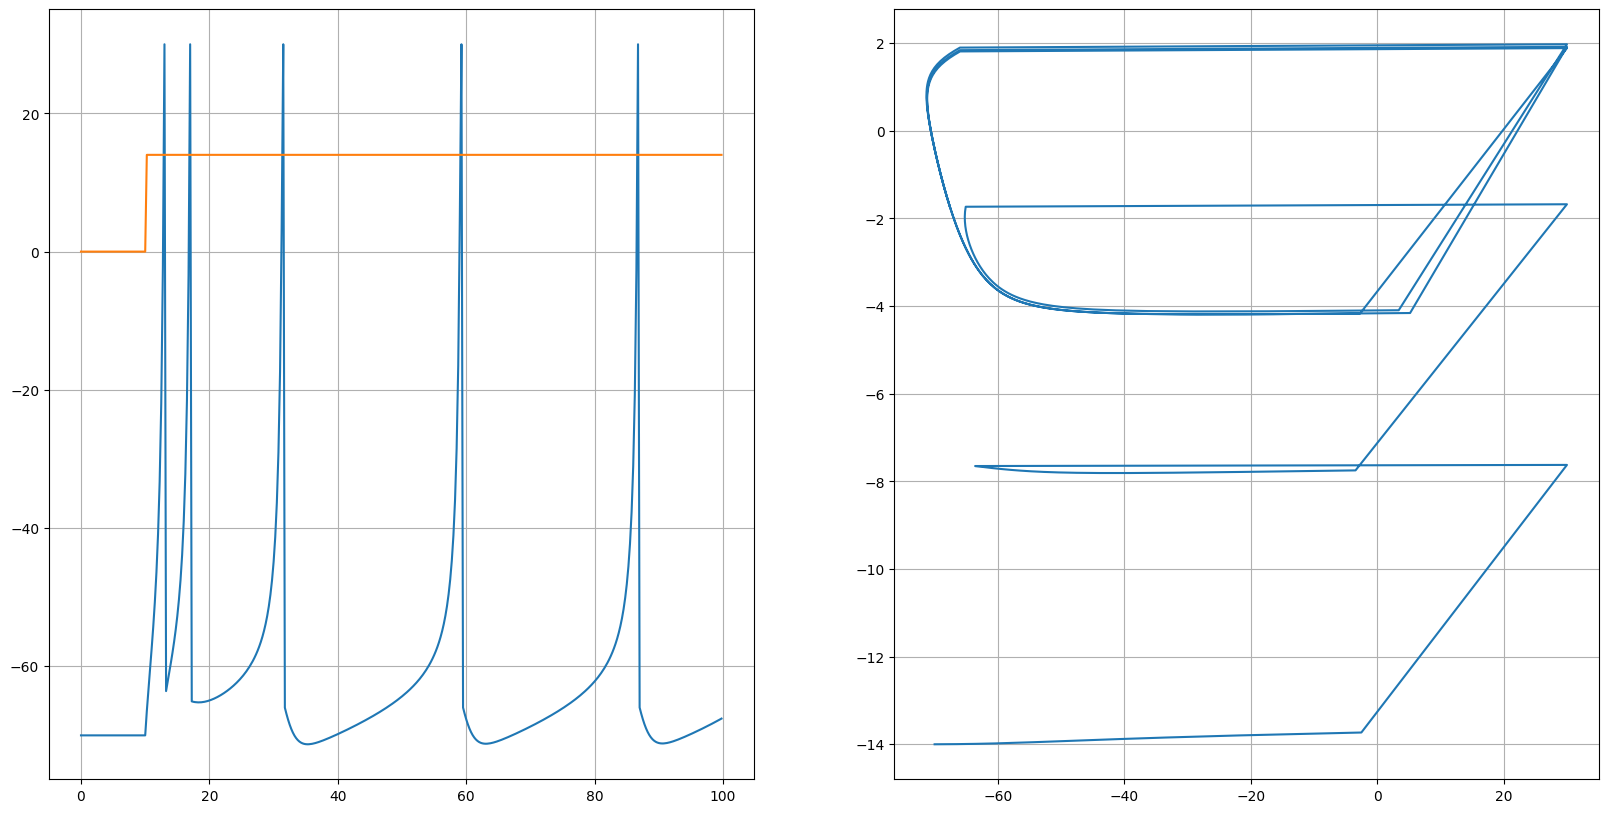

In [5]:
# A - tonic spiking
t_max = 100


def gen_current(t):
    if t > t_max / 10:
        return 14
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    u=-70,
    a=0.02,
    b=0.2,
    c=-65,
    d=6,
    t_max=t_max,
    tau=0.25,
)

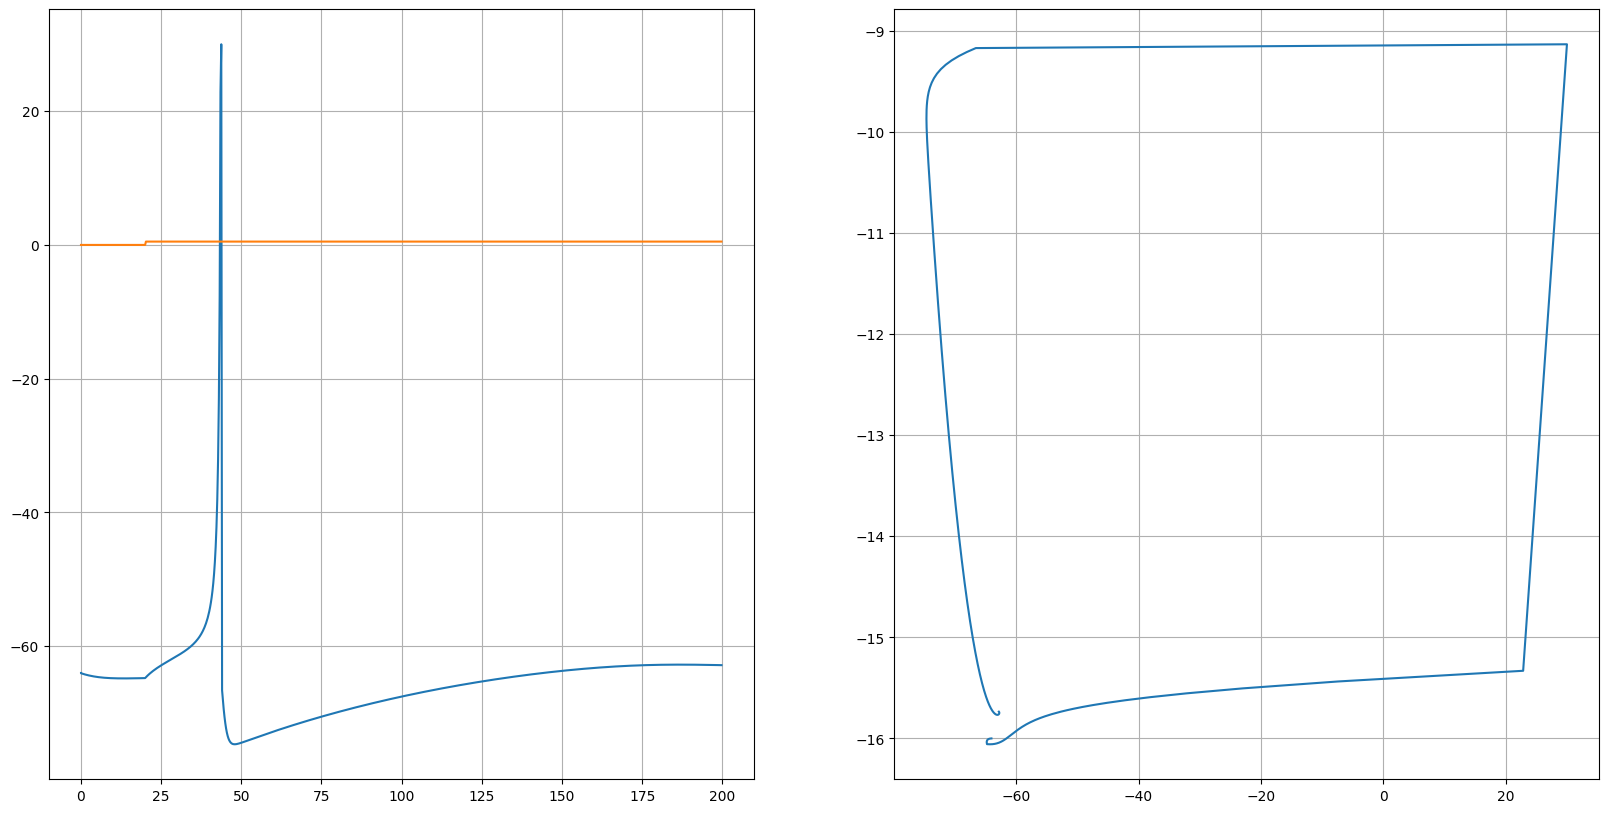

In [6]:
# B - phasic spiking
def gen_current(t):
    if t > 20:
        return 0.5
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=0.25,
    c=-65,
    d=6,
    u=-64,
    t_max=200,
    tau=0.25,
)

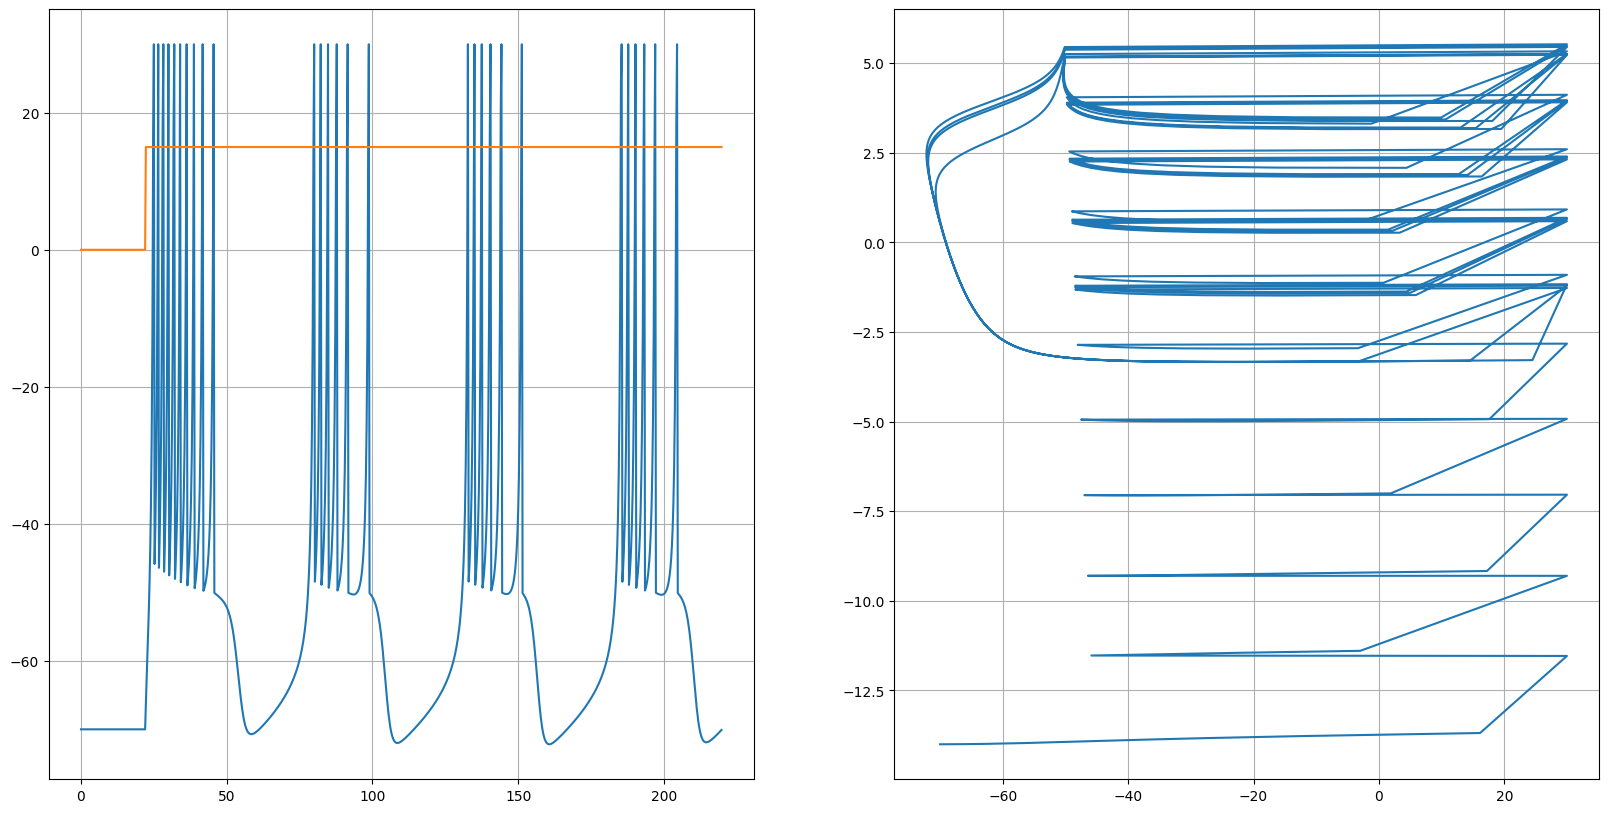

In [7]:
# C - tonic bursting
def gen_current(t):
    if t > 22:
        return 15
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=0.2,
    c=-50,
    d=2,
    u=-70,
    t_max=220,
    tau=0.25,
)

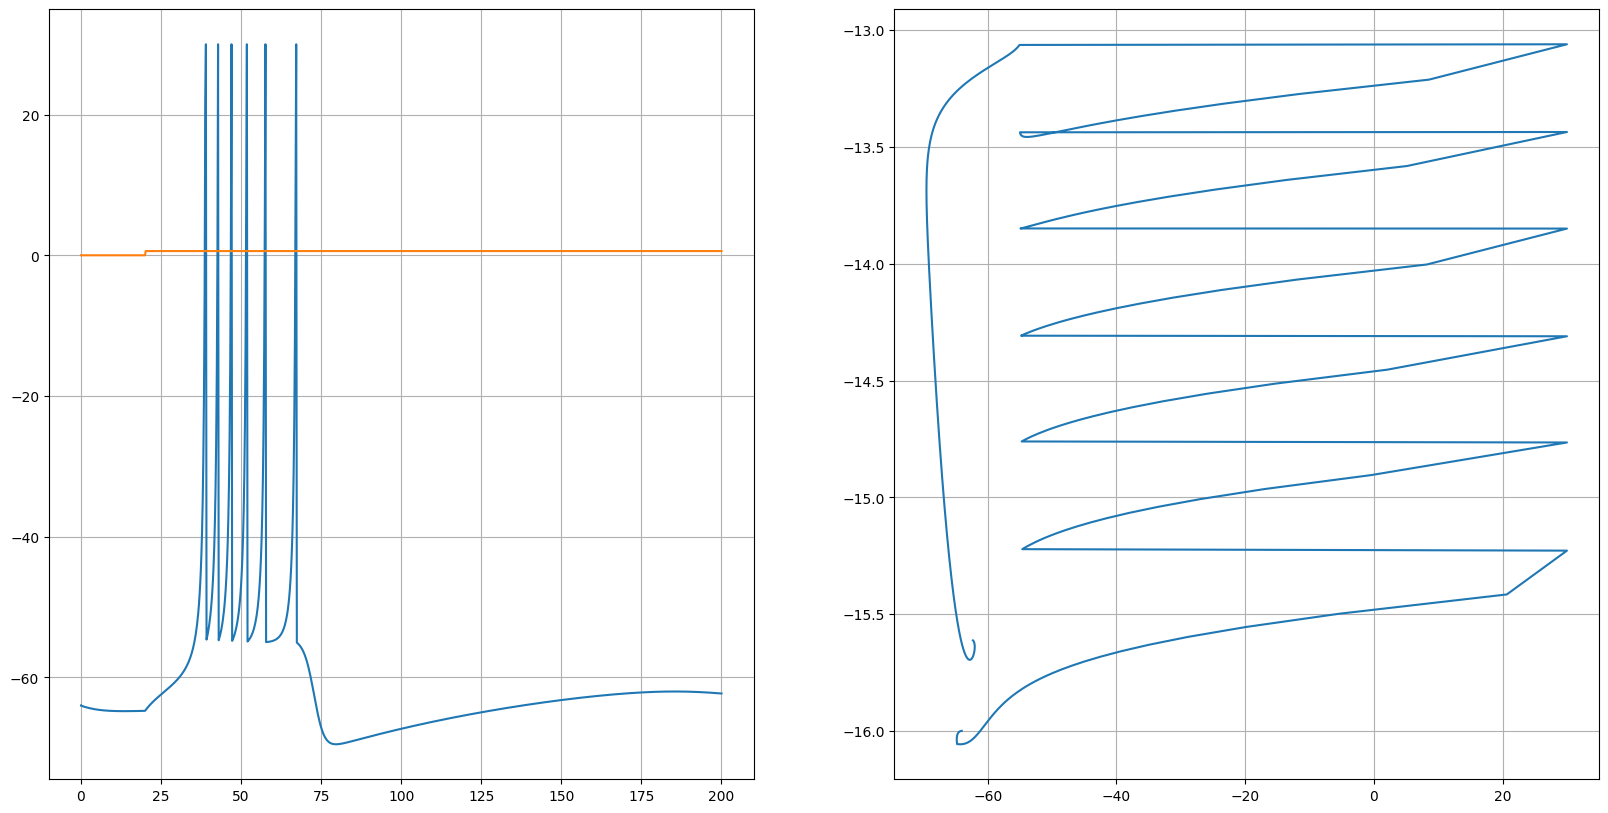

In [8]:
# D - phasic bursting
def gen_current(t):
    if t > 20:
        return 0.6
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=0.25,
    c=-55,
    d=0.05,
    u=-64,
    t_max=200,
    tau=0.2,
)

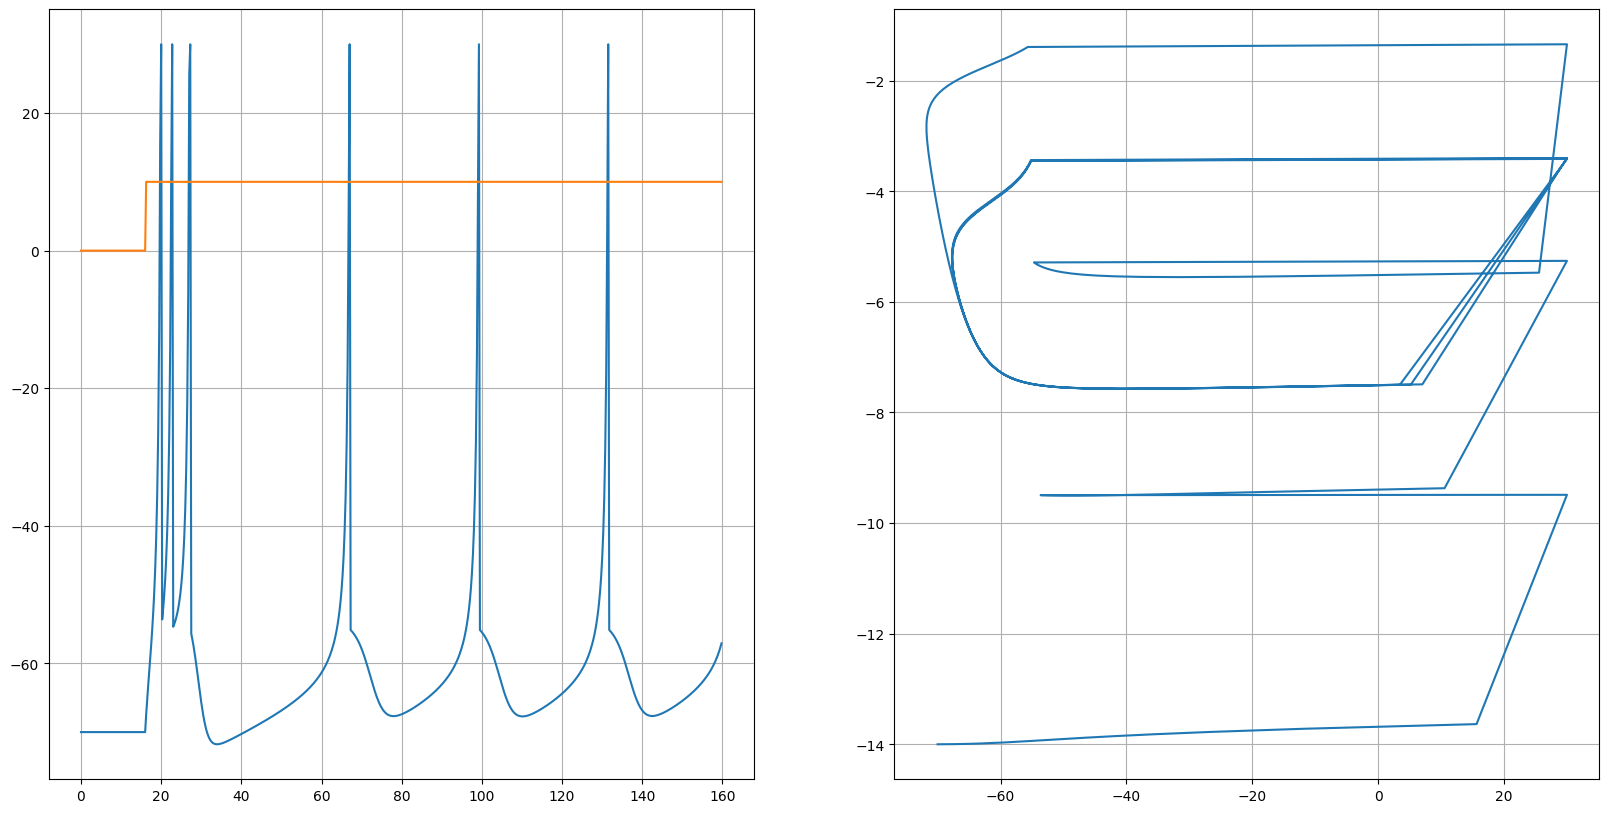

In [9]:
# E - mixed mode
t_max = 160


def gen_current(t):
    if t > t_max / 10:
        return 10
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=0.2,
    c=-55,
    d=4,
    u=-70,
    t_max=t_max,
    tau=0.25,
)

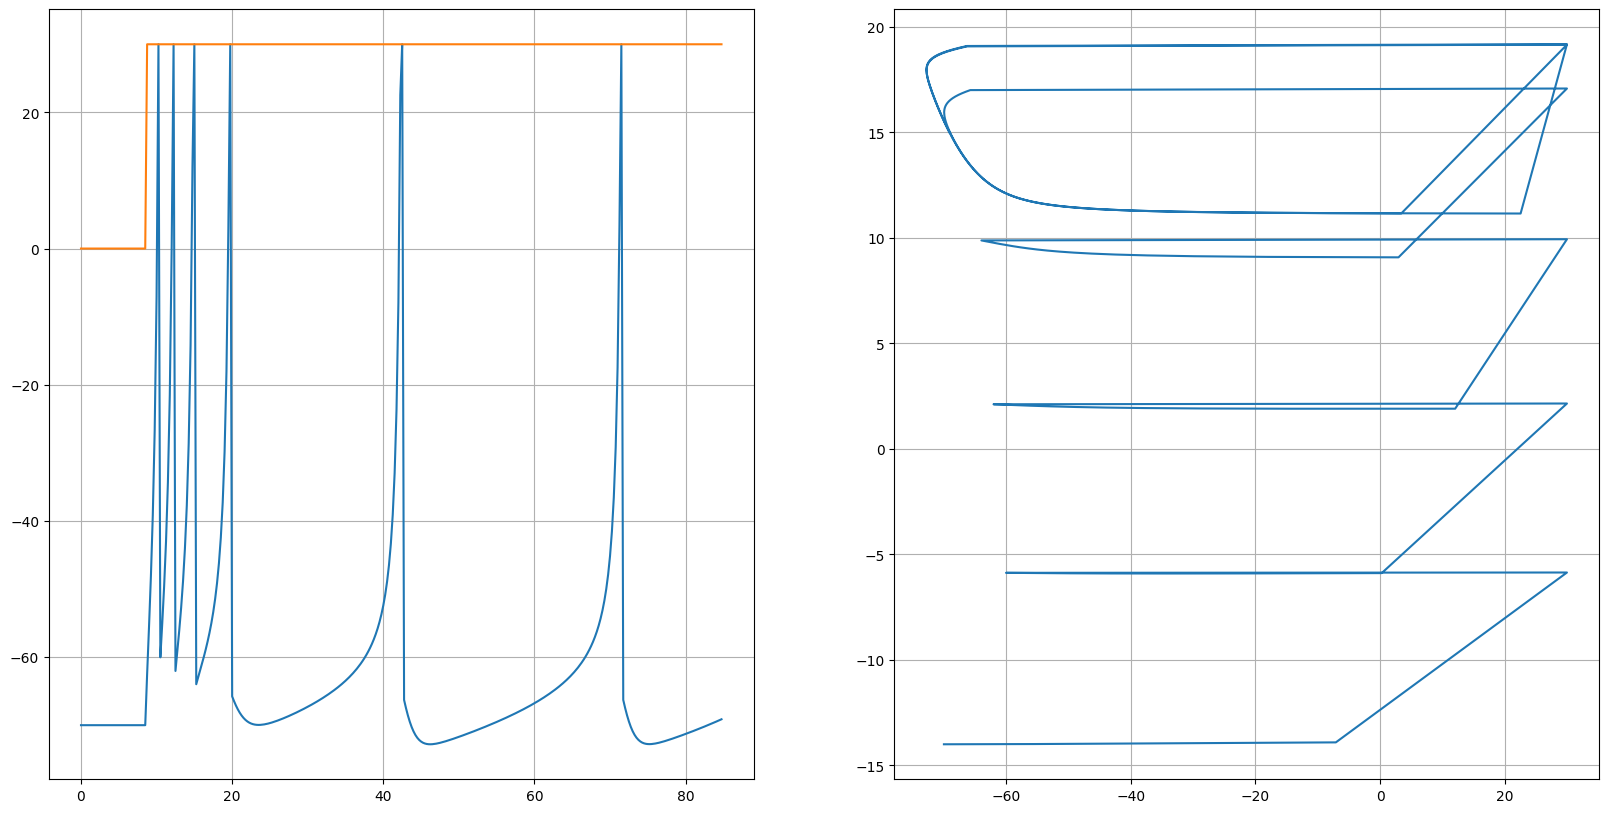

In [10]:
# F - spike freq. adapt
t_max = 85


def gen_current(t):
    if t > t_max / 10:
        return 30
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.01,
    b=0.2,
    c=-65,
    d=8,
    u=-70,
    t_max=t_max,
    tau=0.25,
)

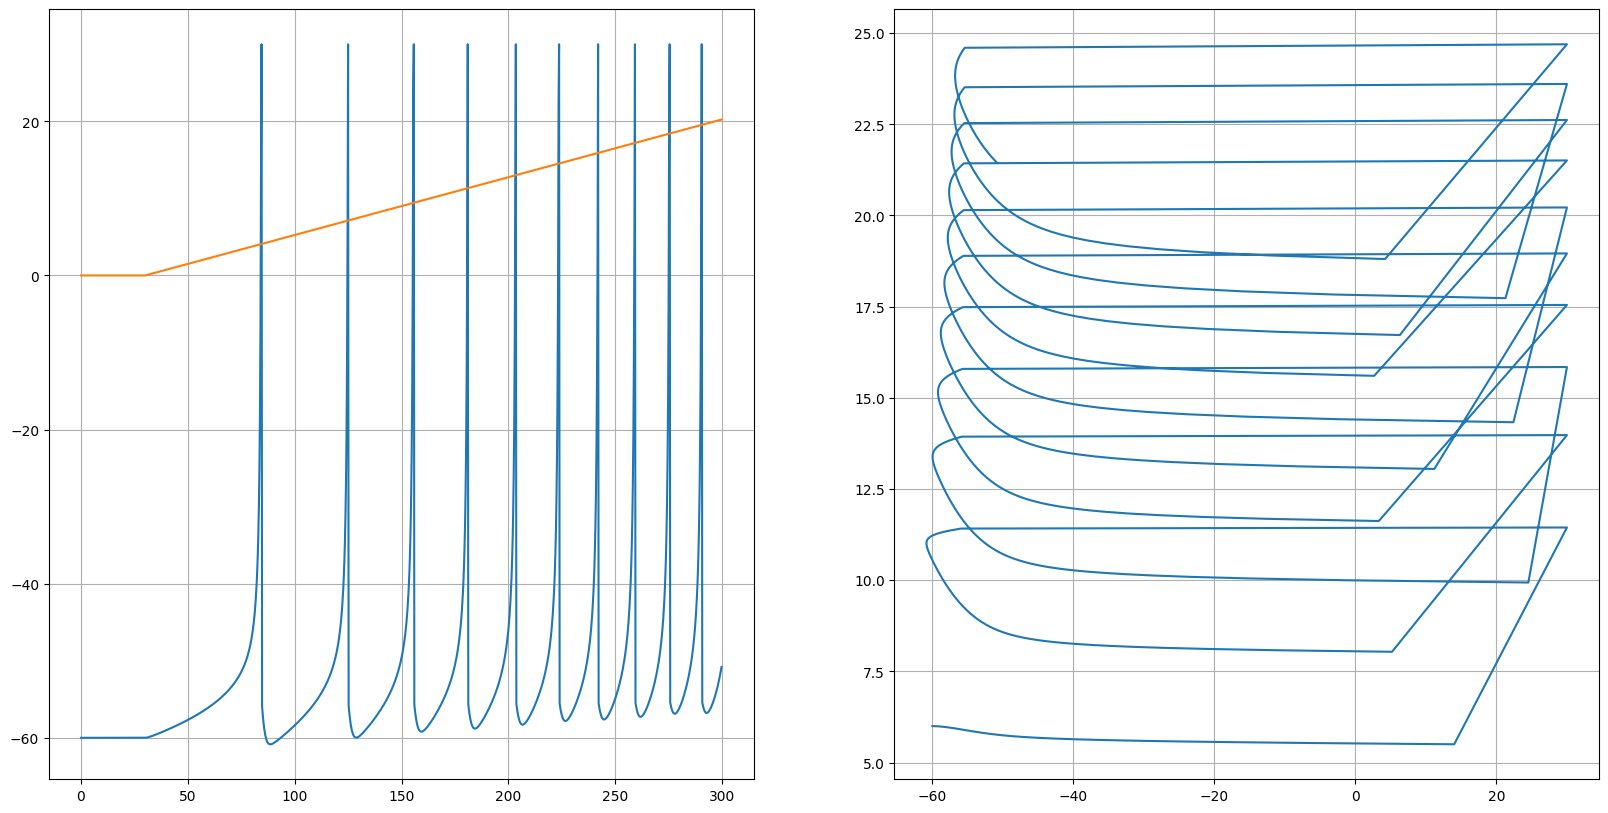

In [11]:
# G - Class 1 exc.
def gen_current(t):
    if t > 30:
        return 0.075 * (t - 30)
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=-0.1,
    c=-55,
    d=6,
    u=-60,
    t_max=300,
    tau=0.25,
    c2=4.1,
    c3=108
)

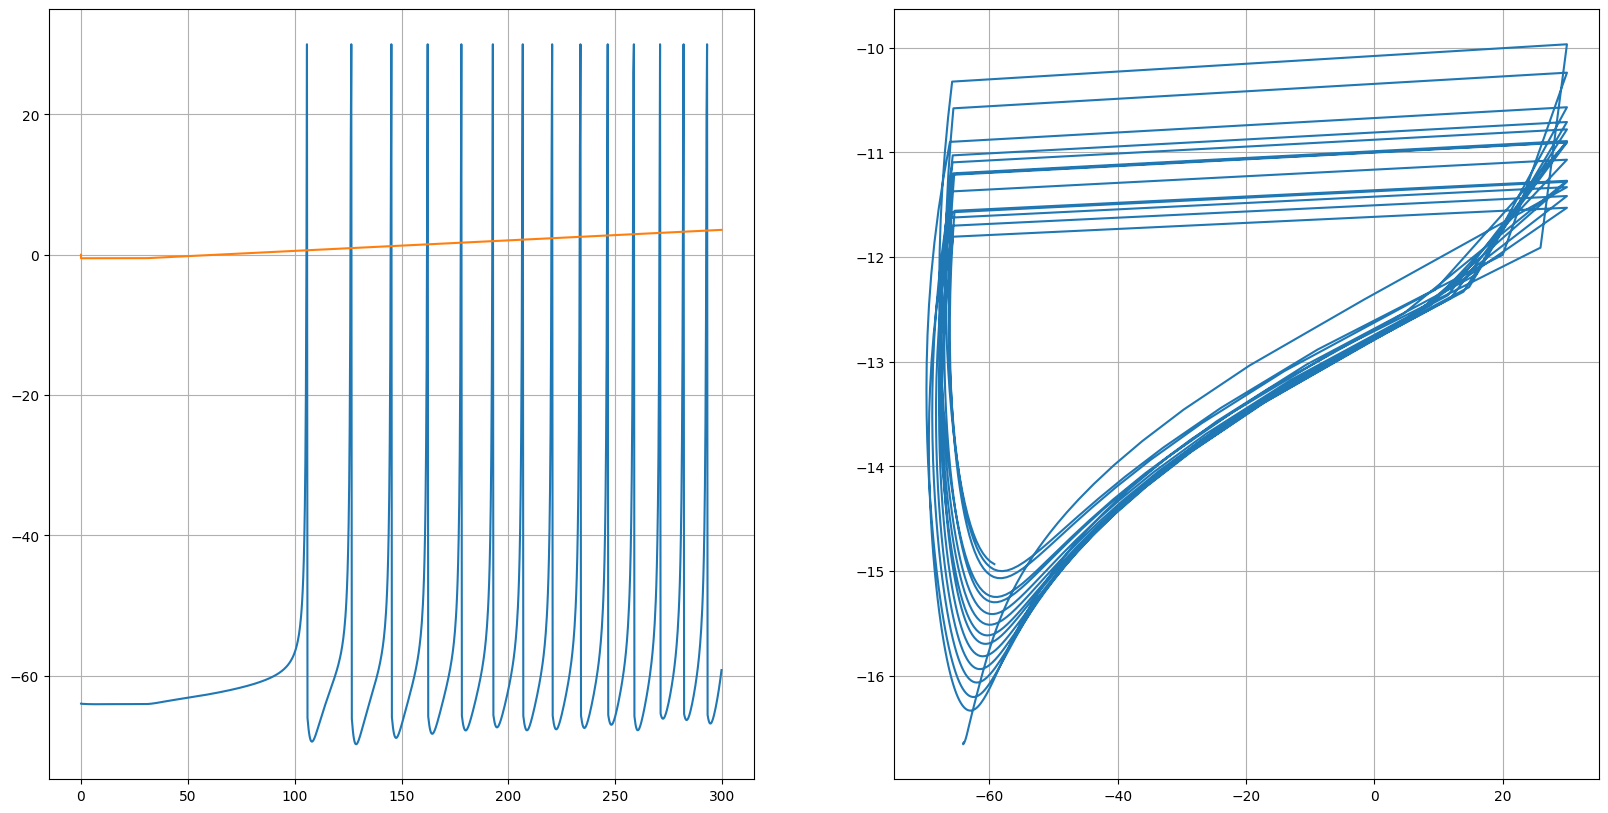

In [12]:
# H - Class 2 exc.
T1 = 30


def gen_current(t):
    if t > T1:
        return -0.5 + (0.015 * (t - T1));
    else:
        return -0.5;


simulate_neuron(
    gen_current=gen_current,
    a=0.2,
    b=0.26,
    c=-65,
    d=0,
    u=-64,
    t_max=300,
    tau=0.25,
)

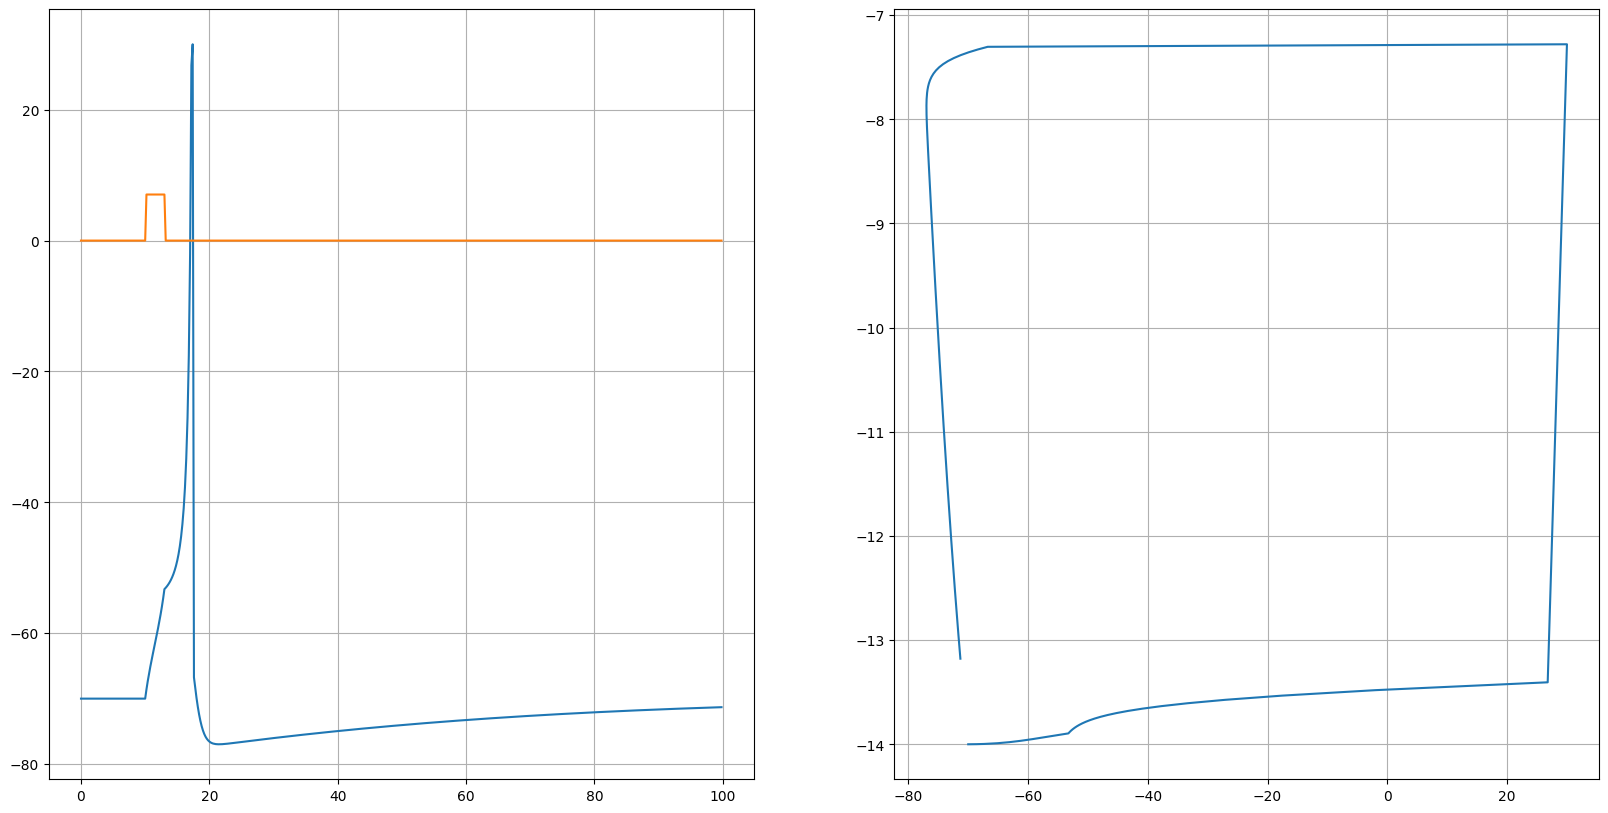

In [13]:
# I - spike latency
t_max = 100
T1 = t_max / 10


def gen_current(t):
    if T1 < t < T1 + 3:
        return 7.04;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=0.2,
    c=-65,
    d=6,
    u=-70,
    t_max=t_max,
    tau=0.2,
)

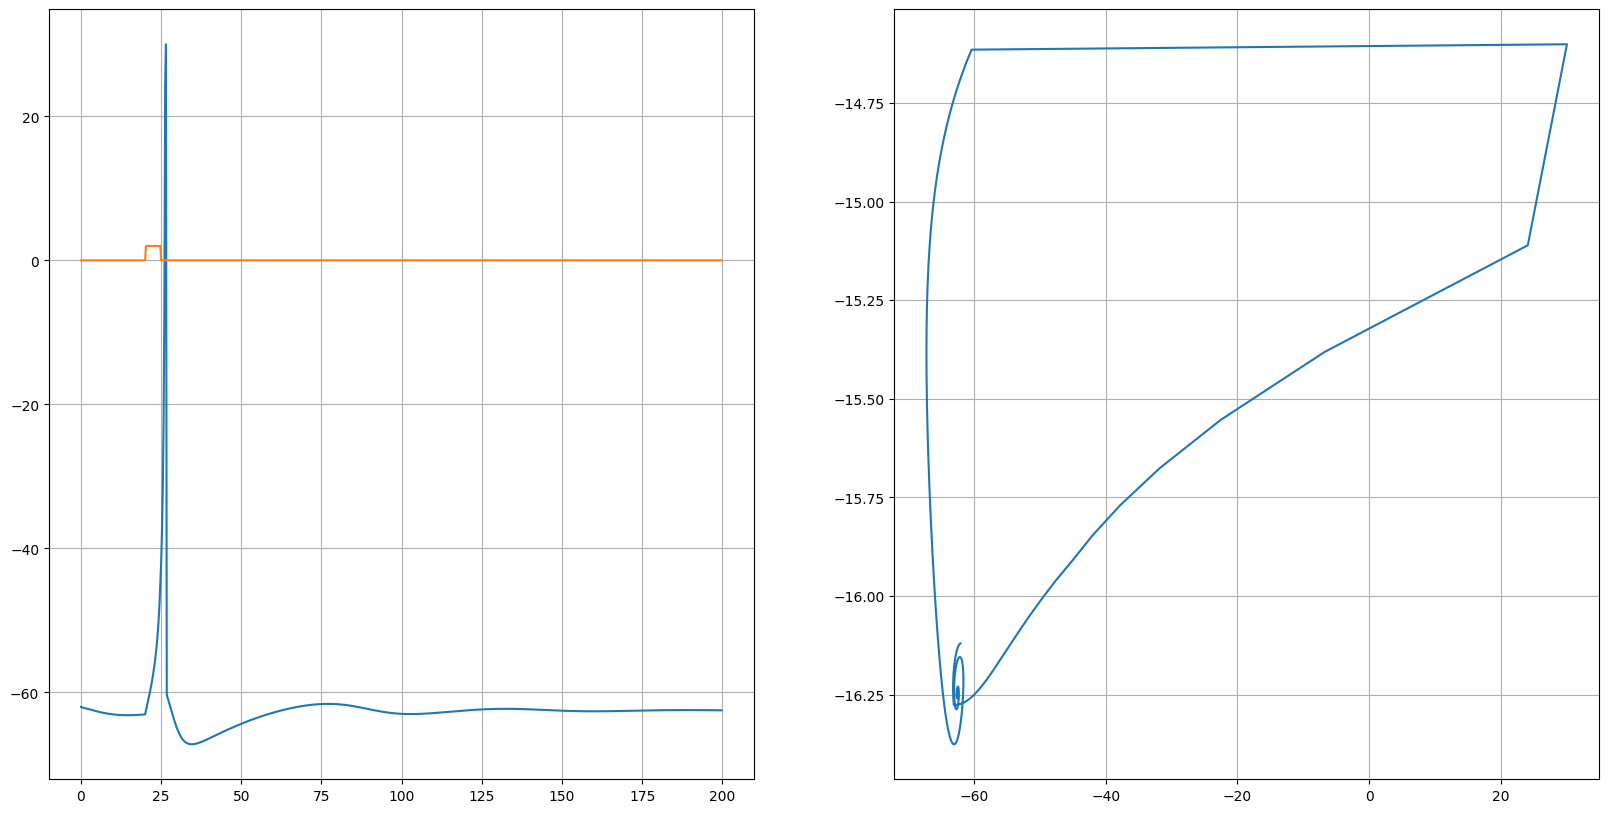

In [14]:
# J - subtresh. osc.
t_max = 200
T1 = t_max / 10


def gen_current(t):
    if T1 < t < T1 + 5:
        return 2;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.05,
    b=0.26,
    c=-60,
    d=0,
    u=-62,
    t_max=t_max,
    tau=0.25,
)

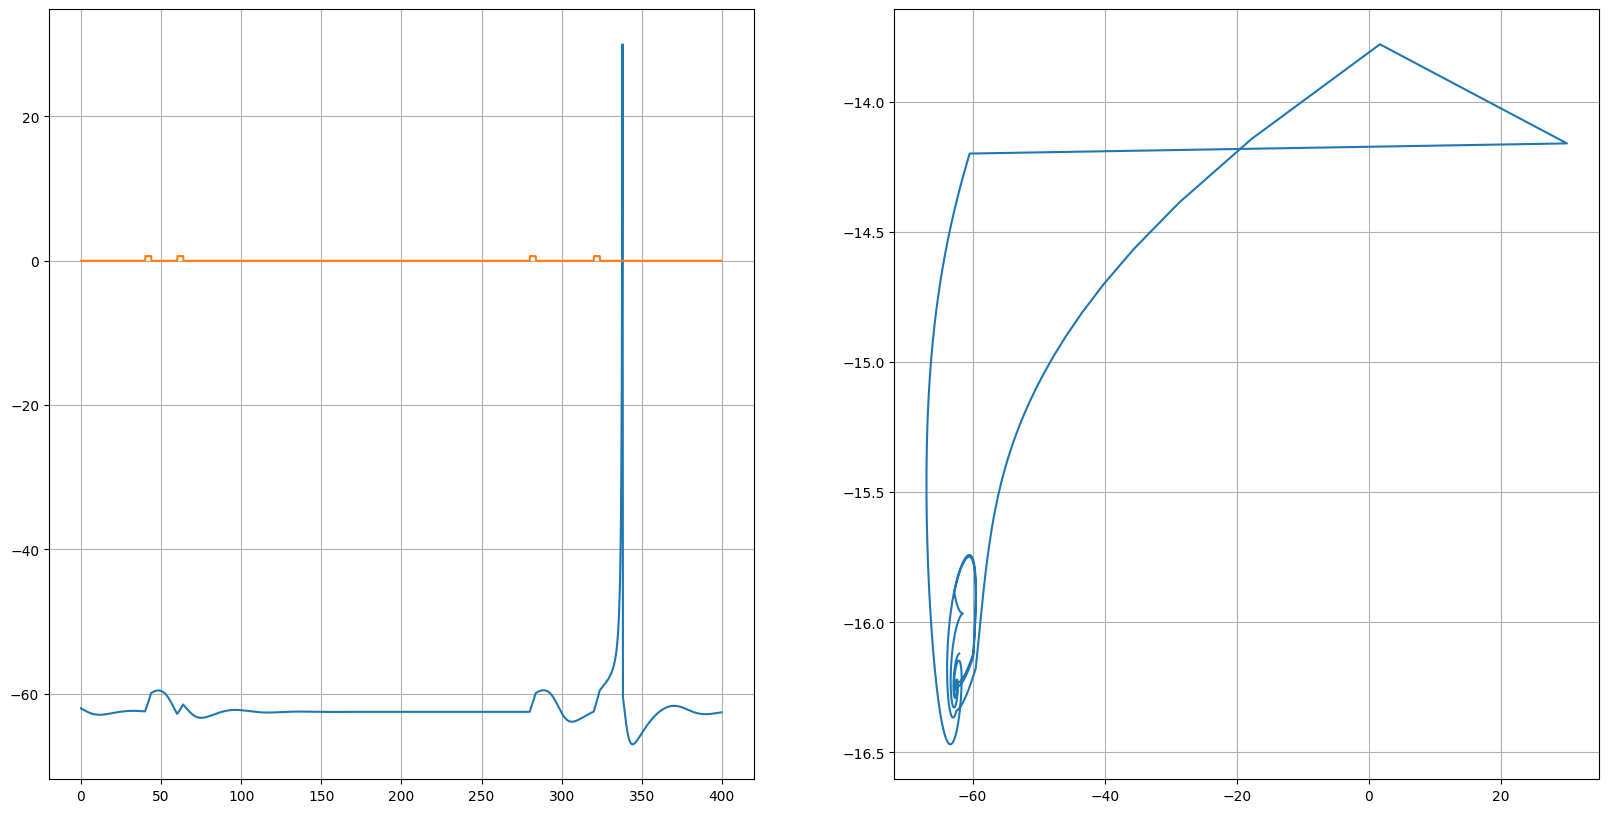

In [15]:
# K - resonator
t_max = 400
T1 = t_max / 10
T2 = T1 + 20
T3 = 0.7 * t_max
T4 = T3 + 40


def gen_current(t):
    if T1 < t < T1 + 4 or T2 < t < T2 + 4 or T3 < t < T3 + 4 or T4 < t < T4 + 4:
        return 0.65;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.1,
    b=0.26,
    c=-60,
    d=-1,
    u=-62,
    t_max=t_max,
    tau=0.25,
)

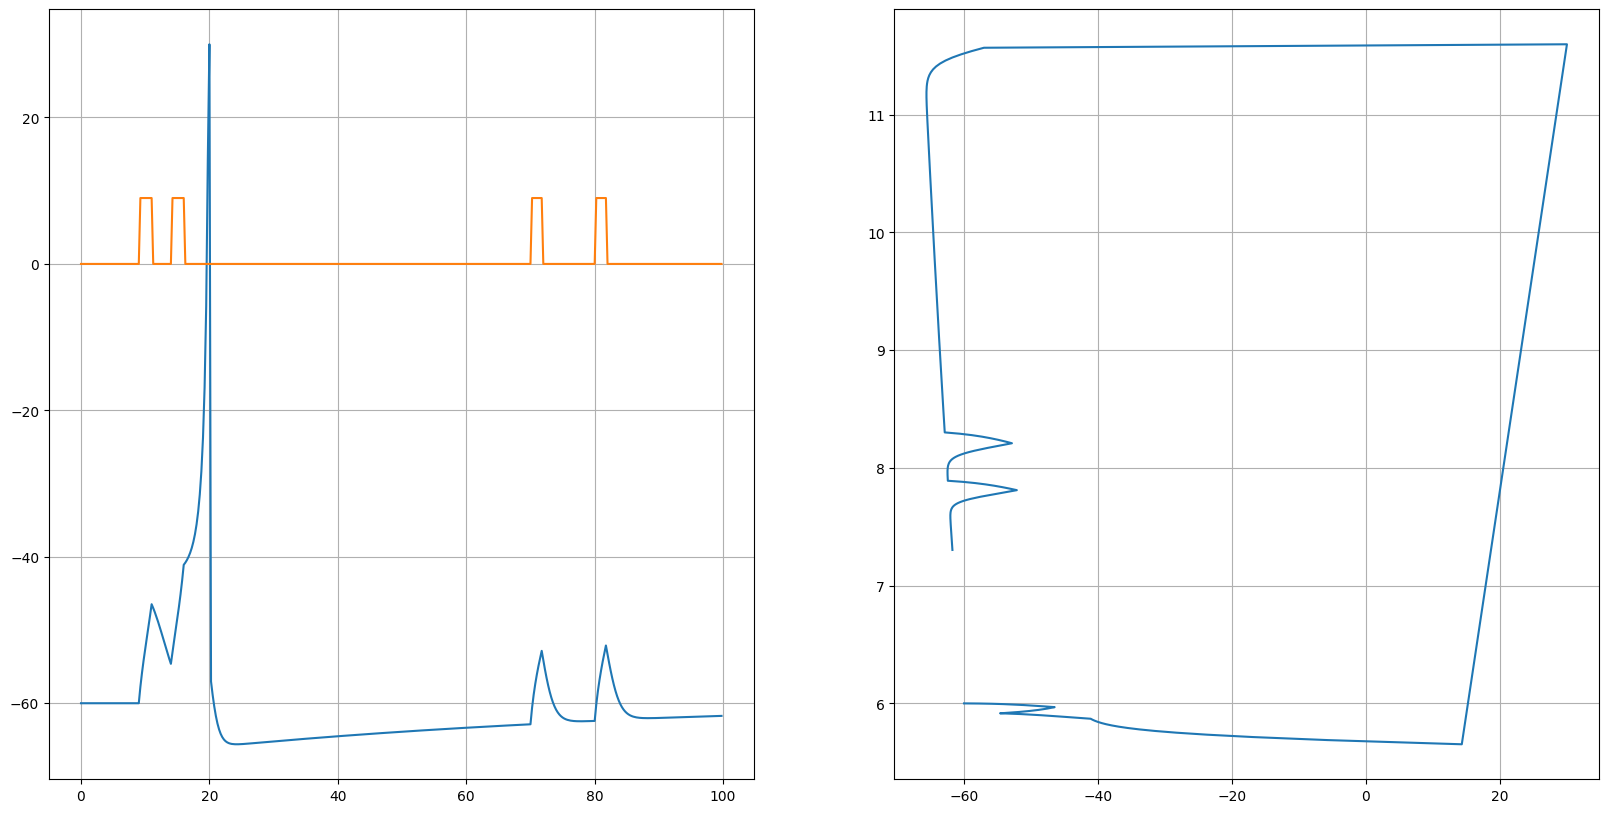

In [16]:
# L - integrator
t_max = 100
T1 = t_max / 11
T2 = T1 + 5
T3 = 0.7 * t_max
T4 = T3 + 10


def gen_current(t):
    if T1 < t < T1 + 2 or T2 < t < T2 + 2 or T3 < t < T3 + 2 or T4 < t < T4 + 2:
        return 9;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=-0.1,
    c=-55,
    d=6,
    u=-60,
    t_max=t_max,
    tau=0.25,
    c2=4.1,
    c3=108
)

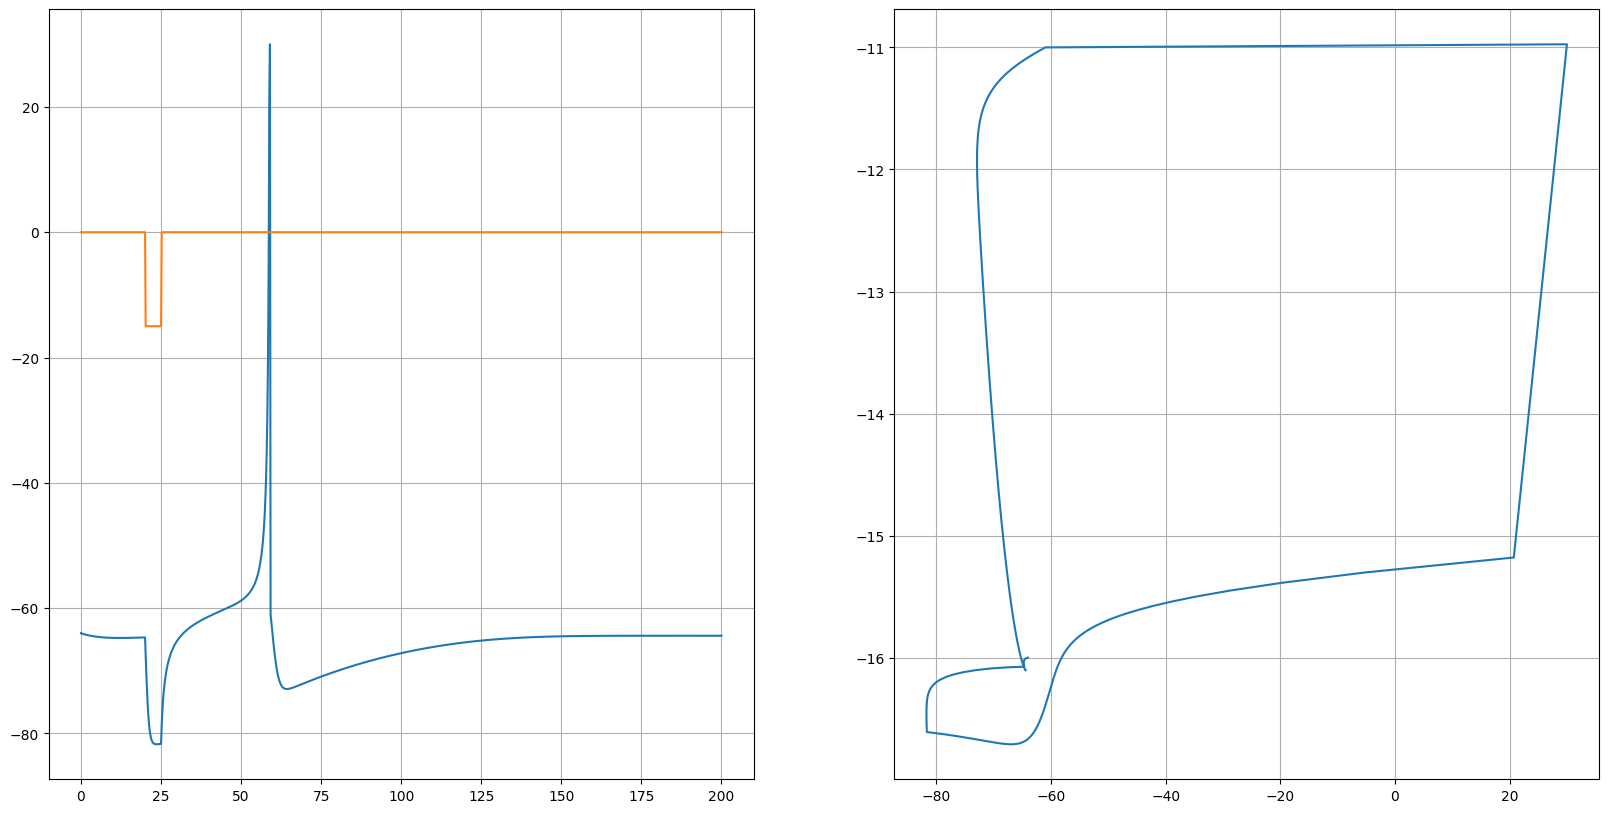

In [17]:
# M - rebound spike
T1 = 20


def gen_current(t):
    if T1 < t < T1 + 5:
        return -15;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.03,
    b=0.25,
    c=-60,
    d=4,
    u=-64,
    t_max=200,
    tau=0.2,
)

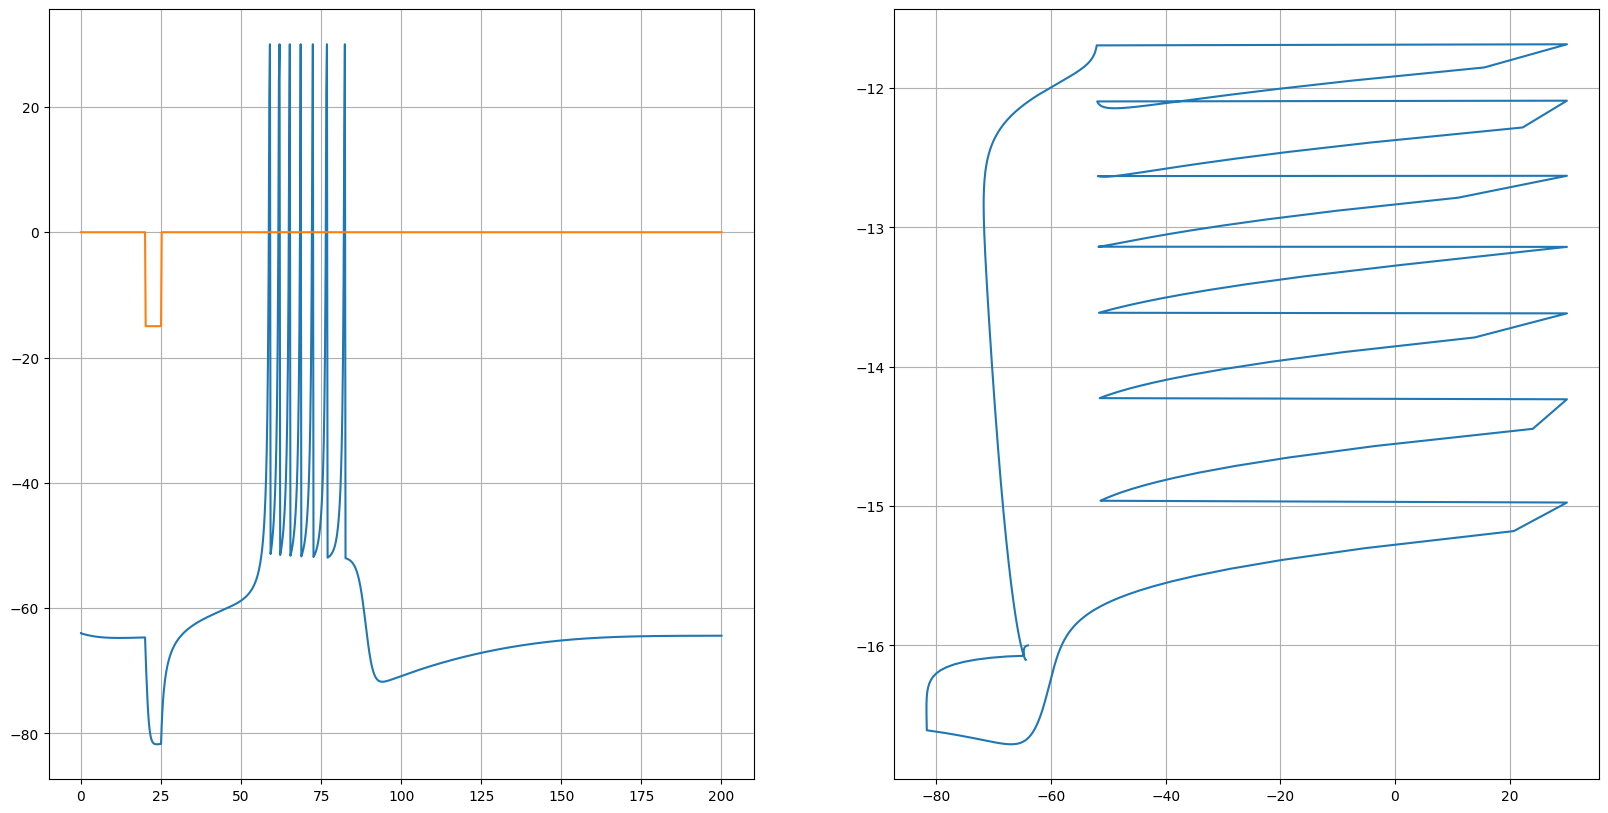

In [18]:
# N - rebound burst
T1 = 20


def gen_current(t):
    if T1 < t < T1 + 5:
        return -15;
    else:
        return 0;


simulate_neuron(
    gen_current=gen_current,
    a=0.03,
    b=0.25,
    c=-52,
    d=0,
    u=-64,
    t_max=200,
    tau=0.2,
)

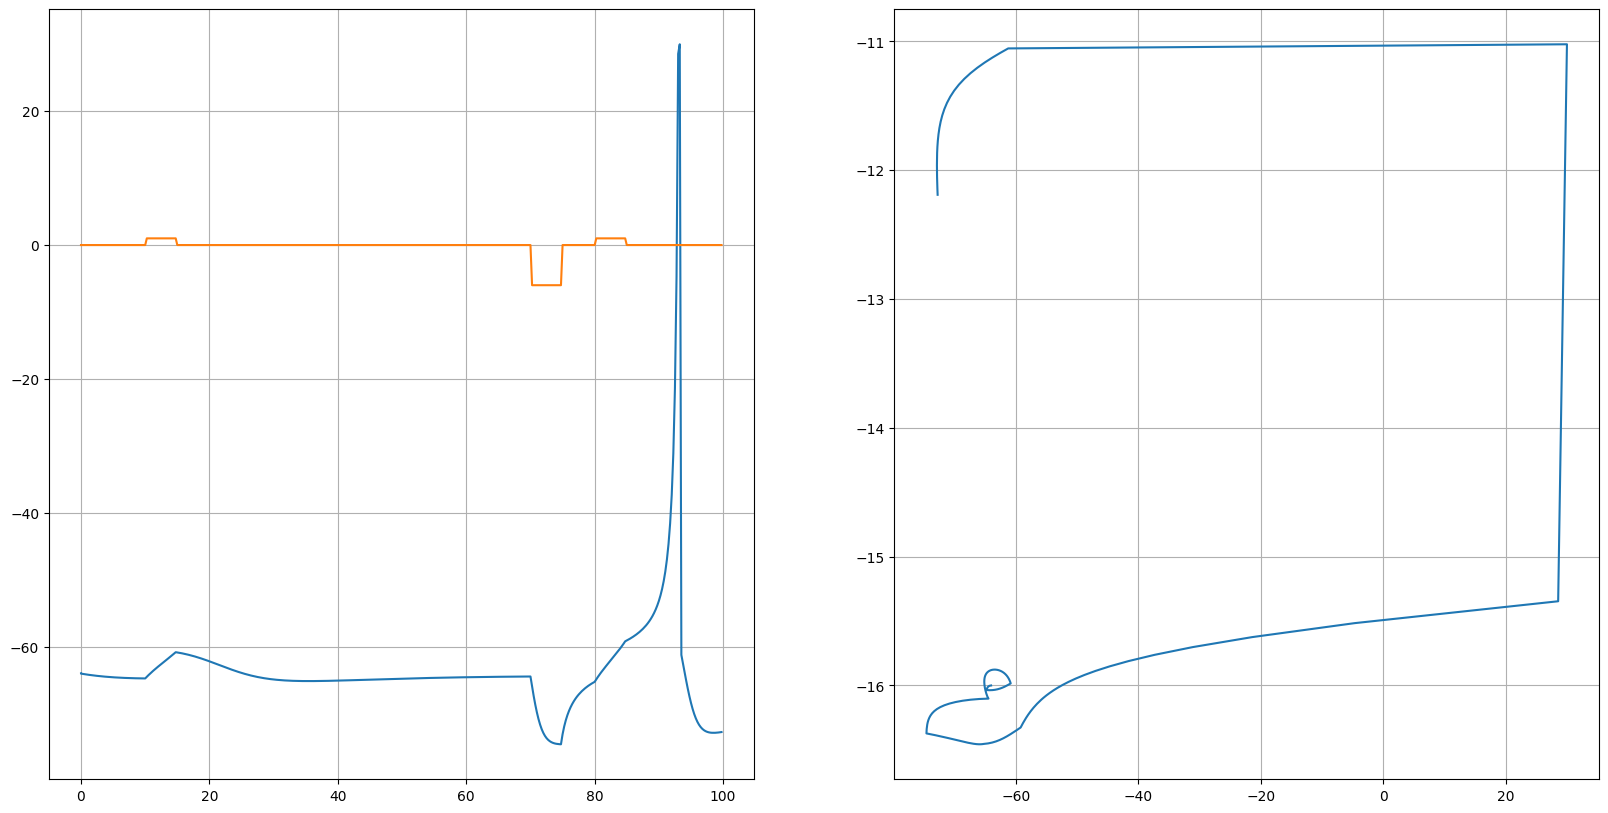

In [19]:
# O - thresh. variability
def gen_current(t):
    if 10 < t < 15 or 80 < t < 85:
        return 1
    elif 70 < t < 75:
        return -6
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.03,
    b=0.25,
    c=-60,
    d=4,
    u=-64,
    t_max=100,
    tau=0.25,
)

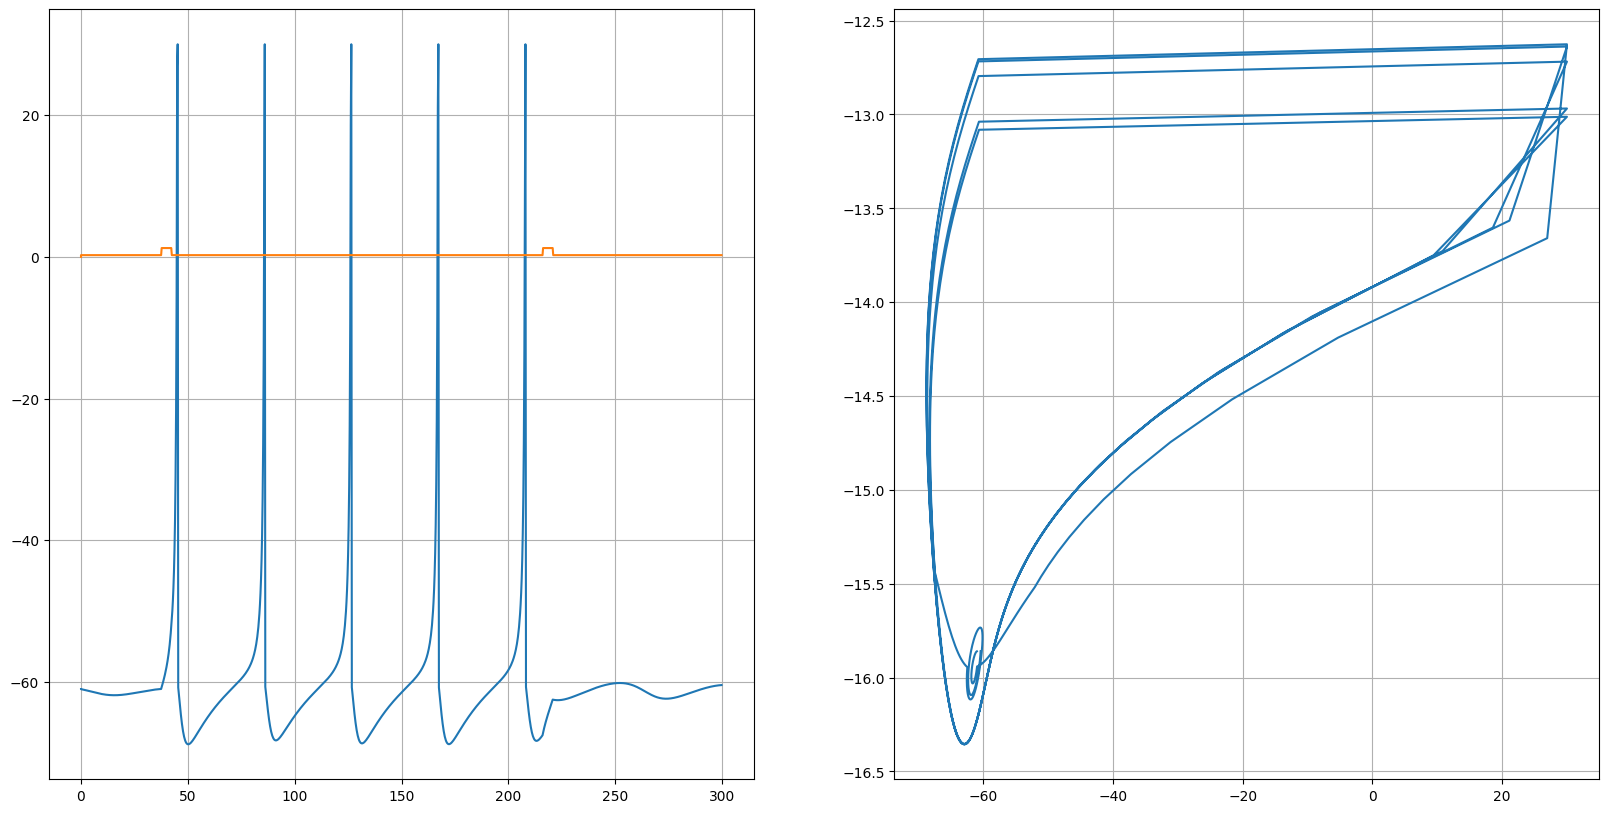

In [20]:
# P - bistability
t_max = 300
T1 = t_max / 8
T2 = 216


def gen_current(t):
    if T1 < t < T1 + 5 or T2 < t < T2 + 5:
        return 1.24
    else:
        return 0.24


simulate_neuron(
    gen_current=gen_current,
    a=0.1,
    b=0.26,
    c=-60,
    d=0,
    u=-61,
    t_max=t_max,
    tau=0.25,
)

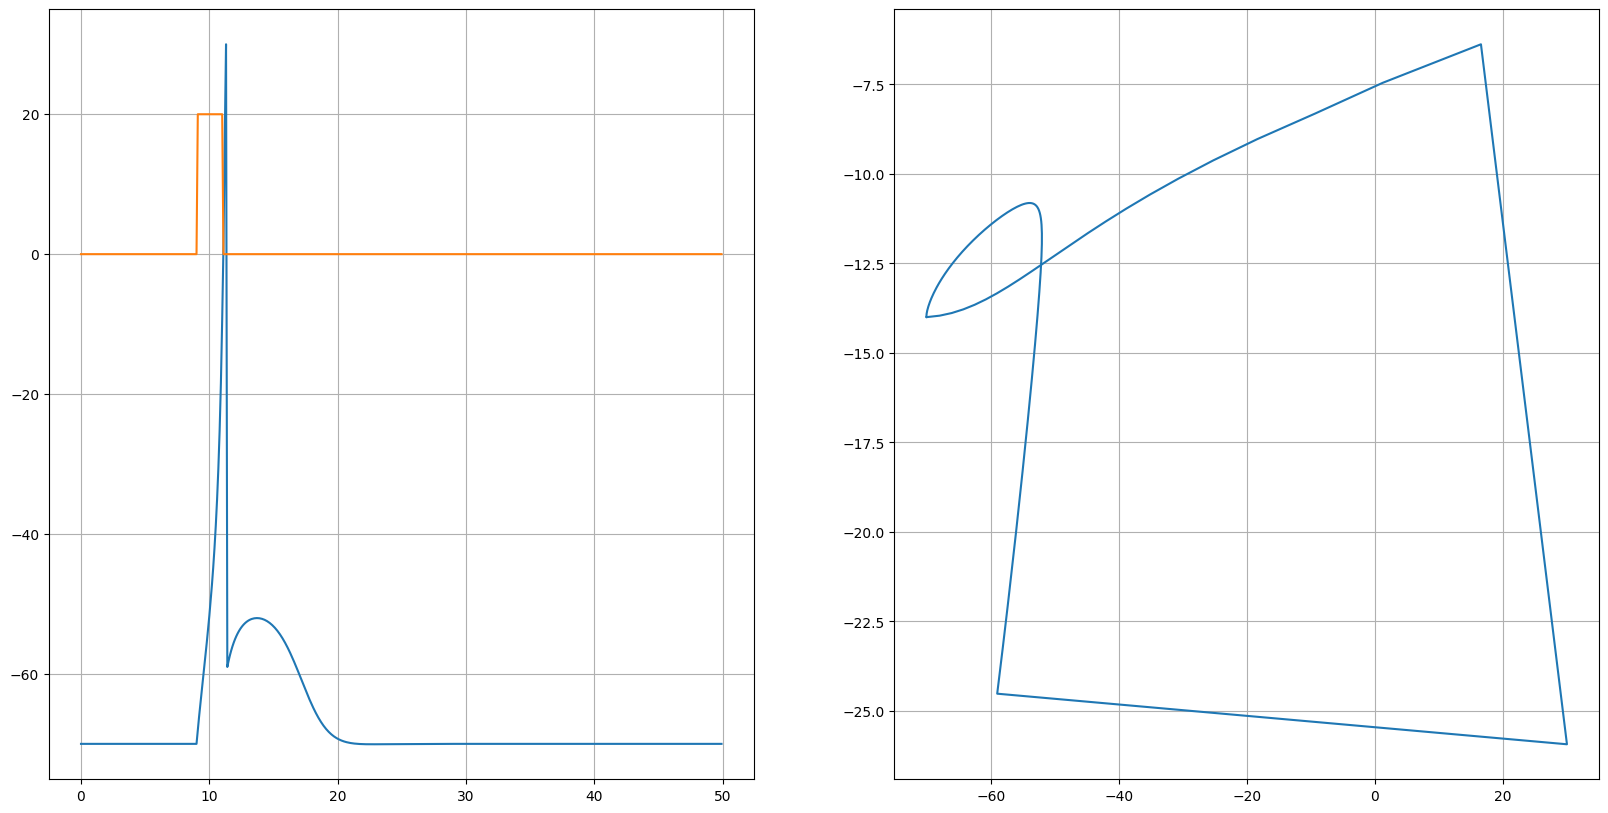

In [21]:
# Q - DAP
T1 = 10


def gen_current(t):
    if abs(t - T1) < 1:
        return 20
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=1,
    b=0.2,
    c=-60,
    d=-21,
    u=-70,
    t_max=50,
    tau=0.1,
)

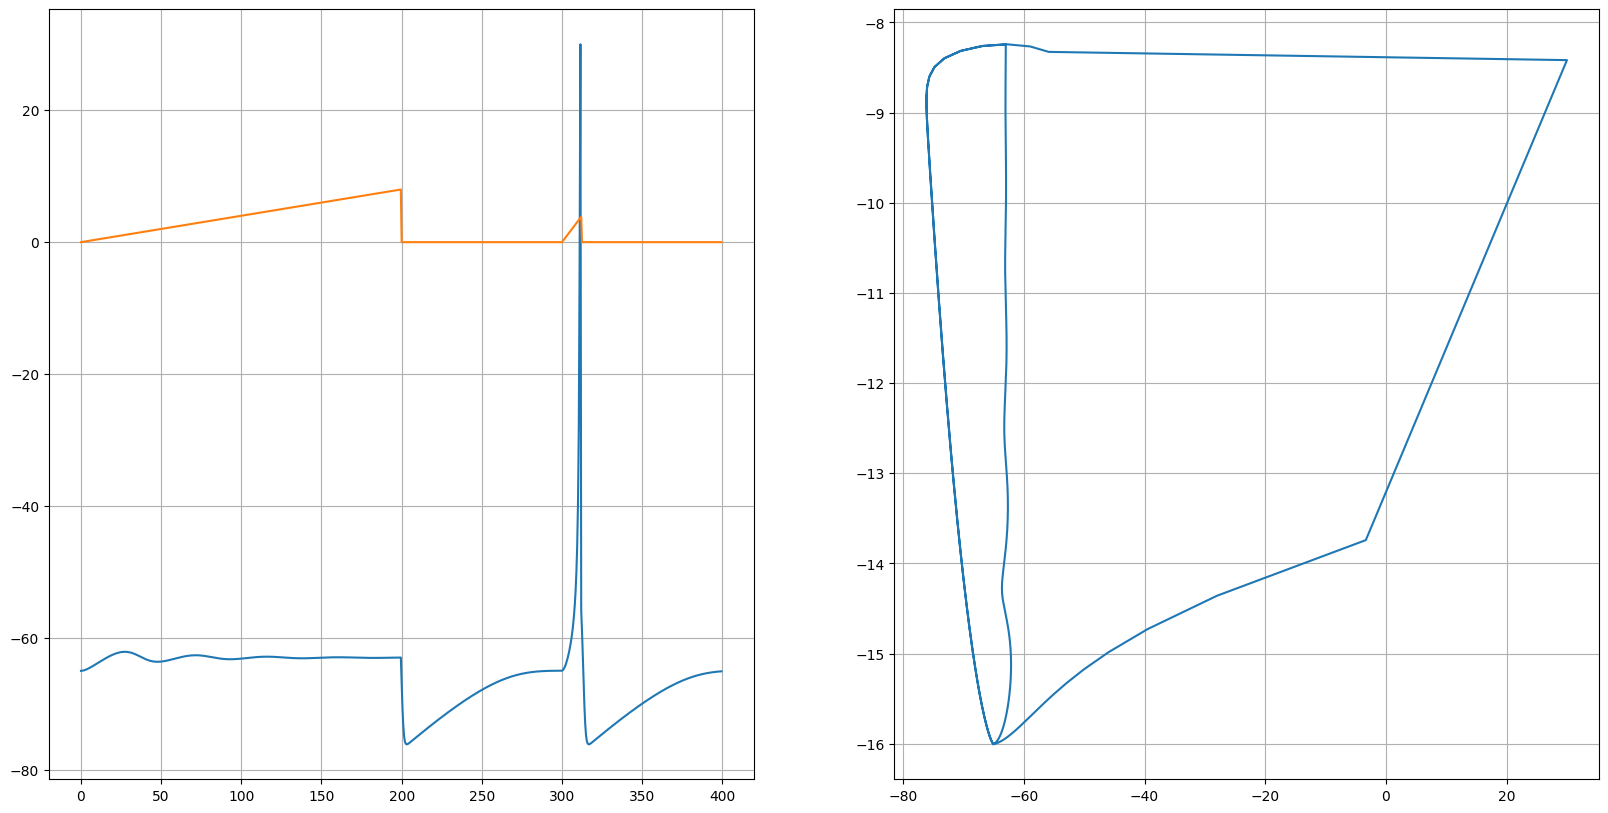

In [22]:
# R - accomodation
def gen_current(t):
    if t < 200:
        return t / 25
    elif t < 300:
        return 0
    elif t < 312.5:
        return (t - 300) / 12.5 * 4
    else:
        return 0


simulate_neuron(
    gen_current=gen_current,
    a=0.02,
    b=1,
    c=-55,
    d=4,
    u=-65,
    w=-16,
    t_max=400,
    tau=0.5,
    w_inc=lambda a, b, u: a * b * (u + 65)
)

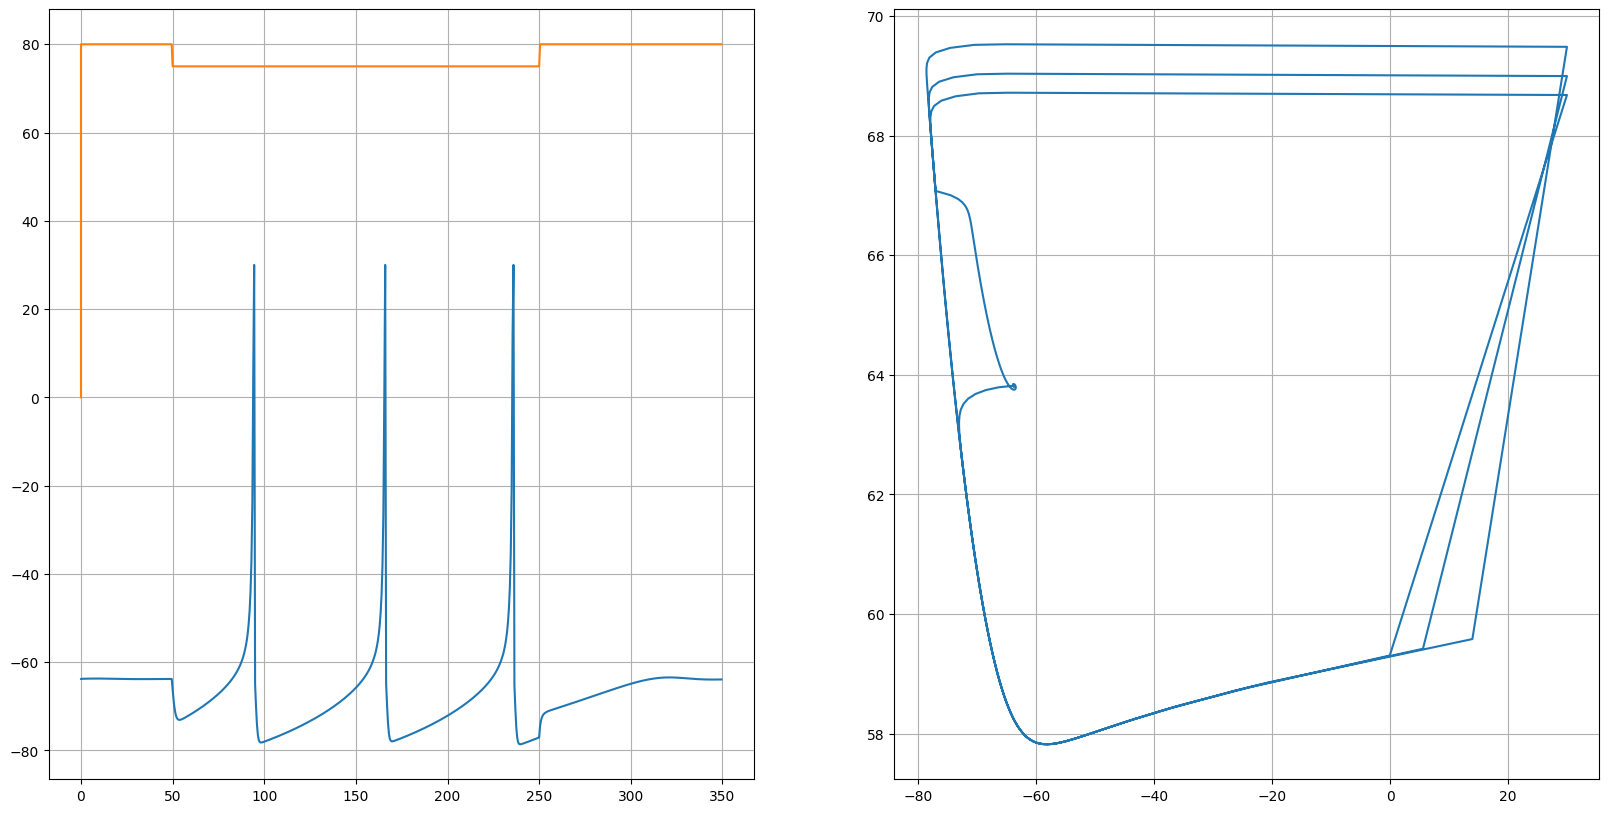

In [23]:
# S - inhibition induced spiking
def gen_current(t):
    if t < 50 or 250 < t:
        return 80
    else:
        return 75


simulate_neuron(
    gen_current=gen_current,
    a=-0.02,
    b=-1,
    c=-60,
    d=8,
    u=-63.8,
    t_max=350,
    tau=0.5,
)

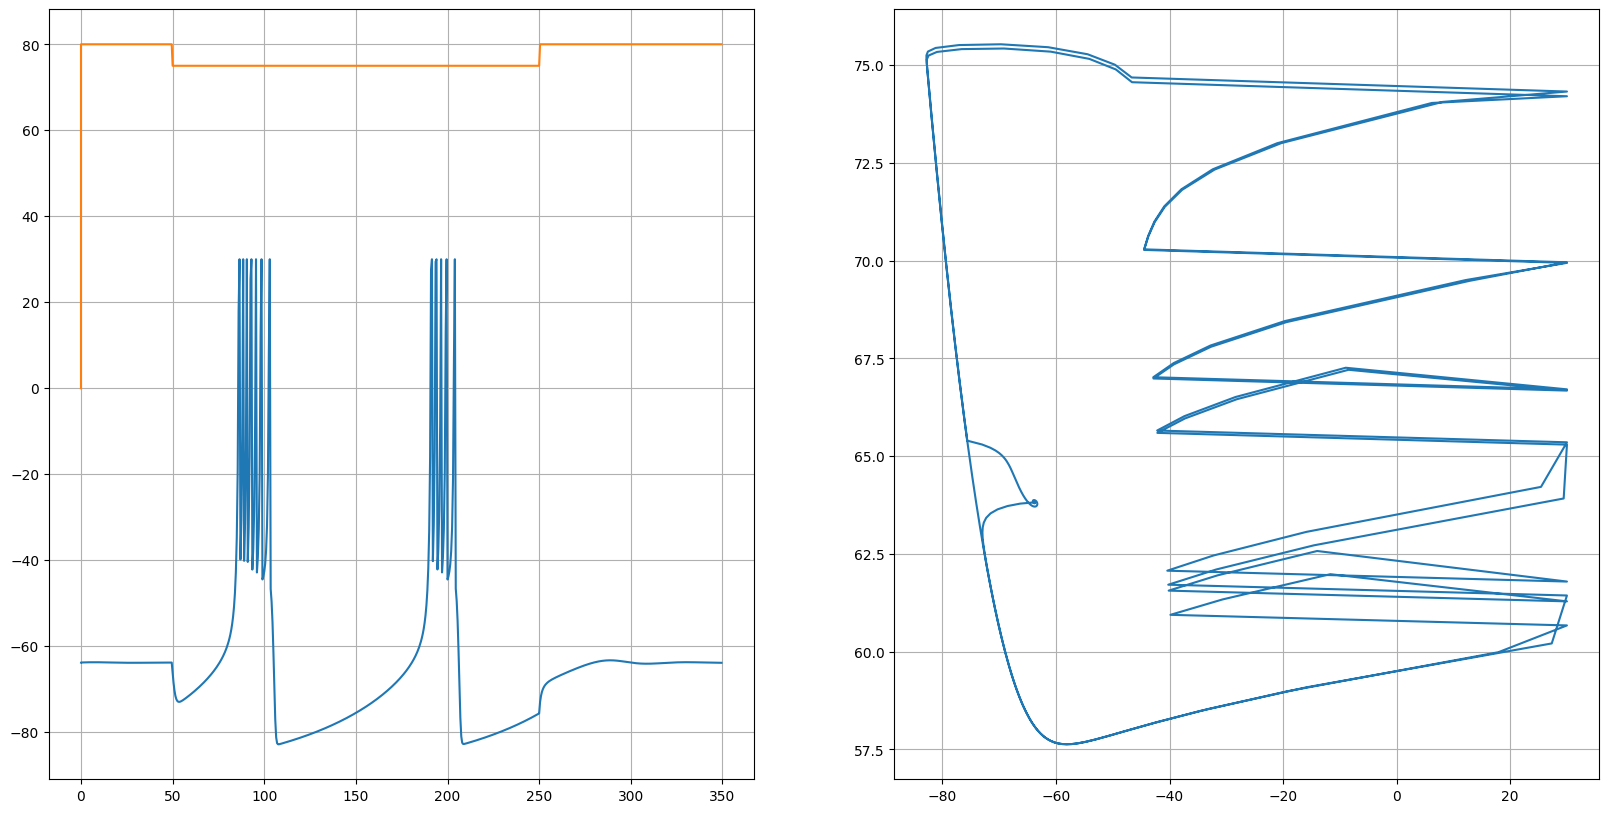

In [24]:
# T - inhibition induced bursting
def gen_current(t):
    if t < 50 or 250 < t:
        return 80
    else:
        return 75


simulate_neuron(
    gen_current=gen_current,
    a=-0.026,
    b=-1,
    c=-45,
    d=-2,
    u=-63.8,
    t_max=350,
    tau=0.5,
)